In [ ]:
!pip install tf_slim
!pip install tf-models-official
!pip install lvis

# Instalar Object Detection

In [ ]:
import os
%cd /content


!git clone https://github.com/tensorflow/models.git


#!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
print("Que está pasando X1?")
%cd /content/models/research
print("Que está pasando X2?")
!protoc object_detection/protos/*.proto --python_out=.
print("Que está pasando X3?")
!git clone https://github.com/cocodataset/cocoapi.git
print("Que está pasando x4")
%cd cocoapi/PythonAPI
print("Que está pasando x5")
!make
%cp -r pycocotools /content/models/research
#Installing The OBj Detection API
%cd ..
%cd ..
%pwd
%cp object_detection/packages/tf2/setup.py .
!python -m pip install .
#cd /content/training_demo/pre-trained-models
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
#!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz


#os.environ['PYTHONPATH'] += ':/home/jaime/Documents/entornoV2/models/research/:/home/jaime/Documents/entornoV2/models/research/slim/'
#!python object_detection/builders/model_builder_test.py
#print("Que está pasando FIN?")

In [ ]:
# import os
# %cd /content
# !git clone --quiet https://github.com/tensorflow/models.git
# %cd /content/models/
# !apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
# !pip install -q Cython contextlib2 pillow lxml matplotlib
# !pip install -q pycocotools
# %cd /content/models/research
# !protoc object_detection/protos/*.proto --python_out=.
# os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
# !python object_detection/builders/model_builder_test.py

##Traer el fine_turned_model

In [3]:
import shutil

shutil.copy("/content/drive/MyDrive/1a<---CURSOS---->Personal/fine_tune_model.zip","/content")

print("Descomprime el fine_turned_model")

Descomprime el fine_turned_model


In [4]:
#Descomprimir archivos
#!unzip /content/fine_tune_model.zip
import zipfile
local_zip = "/content/fine_tune_model.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/fine_tune_model")
zip_ref.close()

In [5]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
import numpy as np

## Revisar que la ruta sea la misma de la carpeta.
PATH_TO_MODEL_DIR = "/content/fine_tune_model/content/fine_tune_model"
PATH_TO_SAVE_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

detect_fn = tf.saved_model.load(PATH_TO_SAVE_MODEL)

##Traer el label map

In [6]:
import shutil

shutil.copy("/content/drive/MyDrive/1a<---CURSOS---->Personal/label_map.pbtxt","/content")

print("No descomprimas el label_map")

No descomprimas el label_map


In [7]:
# Cargamos el label map para utilizarlo.
label_map_pbtxt_fname = "/content/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_pbtxt_fname)

#Probamos los resultados con una imagen

In [9]:
#Traer el archivo "moto3"
import shutil

shutil.copy("/content/drive/MyDrive/1a<---CURSOS---->Personal/moto3.jpg","/content")

'/content/moto3.jpg'

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = "/content/moto3.jpg"

image_np = np.asarray(np.array(Image.open(image_path)))
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]
detections = detect_fn(input_tensor)







#Probamos los resultados de nuestro modelo con una imagen

In [ ]:
detections

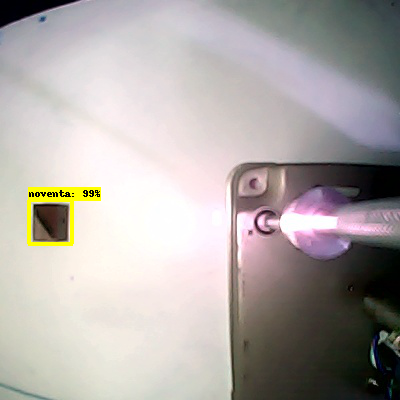

In [ ]:
# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=200,
    min_score_thresh=0.30,
    use_normalized_coordinates = True#borde
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

#**Pruebas No importantes**

In [ ]:
# num_detections = int(detections.pop('num_detections'))

# detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

# detections['num_detections'] = num_detections

# detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# image_np_with_detections = image_np.copy()

# viz_utils.visualize_boxes_and_labels_on_image_array(
#     image_np_with_detections,
#     detections['detection_boxes'],
#     detections['detection_classes'],
#     detections['detection_scores'],
#     category_index,
#     max_boxes_to_draw=200,
#     min_score_thresh=0.30,
#     use_normalized_coordinates=True
# )

# cv2_imshow(image_np_with_detections)

In [ ]:
#Exportar el modelo en formato h5
#detect_fn.save('jaime.h5')

In [ ]:
!tensorflowjs_converter --input_format keras /content/fine_tune_model carpeta_salida